## Step 1: Import Libraries


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

## Step 2: Load the Dataset


In [35]:
file_path = "DDos.pcap_ISCX.csv"
data = pd.read_csv(file_path)

## Step 3: Data Inspection


In [36]:
print("Dataset Information:")
print(data.info())
print("\nSample Data:")
print(data.head())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             225745 non-null  int64  
 1    Flow Duration                225745 non-null  int64  
 2    Total Fwd Packets            225745 non-null  int64  
 3    Total Backward Packets       225745 non-null  int64  
 4   Total Length of Fwd Packets   225745 non-null  int64  
 5    Total Length of Bwd Packets  225745 non-null  int64  
 6    Fwd Packet Length Max        225745 non-null  int64  
 7    Fwd Packet Length Min        225745 non-null  int64  
 8    Fwd Packet Length Mean       225745 non-null  float64
 9    Fwd Packet Length Std        225745 non-null  float64
 10  Bwd Packet Length Max         225745 non-null  int64  
 11   Bwd Packet Length Min        225745 non-null  int64  
 12   Bwd Packet Length Mean

## Step 4: Data Preprocessing


In [37]:
# Handle missing values
data = data.dropna()

# Replace infinite values with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Alternatively, drop rows with NaN values
data.dropna(inplace=True)

# Encode target variable (assume 'Label' is the target column)
data['Label'] = data['Label'].astype('category').cat.codes

# Feature-target split
X = data.drop('Label', axis=1)
y = data['Label']


## Step 5: Handle Class Imbalance


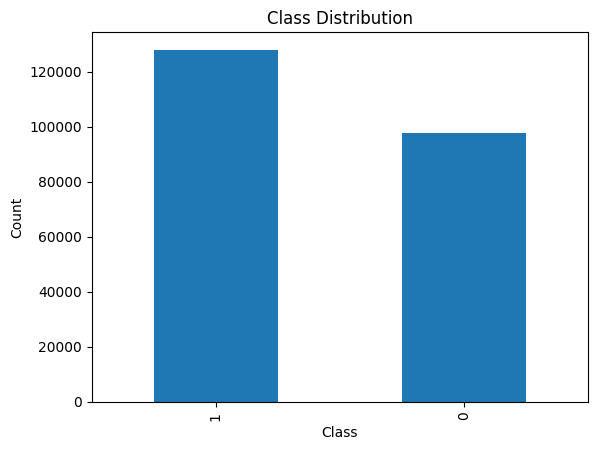

In [38]:
data['Label'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

## Step 6: Split the Dataset


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Step 7: Feature Scaling


In [40]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Step 8: Train and Evaluate a Machine Learning Model


In [48]:


# Initialize classifiers
classifiers = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    #"Random Forest": RandomForestClassifier(random_state=42),
    #"Extra Trees": ExtraTreesClassifier(random_state=42),
    #"XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Initialize variables to track the best model
best_model = None
best_accuracy = 0

# Train and evaluate each classifier
for name, clf in classifiers.items():
    print(f"\nTraining {name}...")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    
    # Track the best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = clf
    
    print(f"Results for {name}:")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Accuracy Score:", accuracy)

# Print the best model
print("\nBest Model:")
print(f"Model: {best_model}")
print(f"Accuracy: {best_accuracy}")


Training Decision Tree...
Results for Decision Tree:
Confusion Matrix:
 [[29315     6]
 [    4 38389]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     29321
           1       1.00      1.00      1.00     38393

    accuracy                           1.00     67714
   macro avg       1.00      1.00      1.00     67714
weighted avg       1.00      1.00      1.00     67714

Accuracy Score: 0.9998523200519833

Best Model:
Model: DecisionTreeClassifier(random_state=42)
Accuracy: 0.9998523200519833


## Step 9: Visualize Results (Optional)


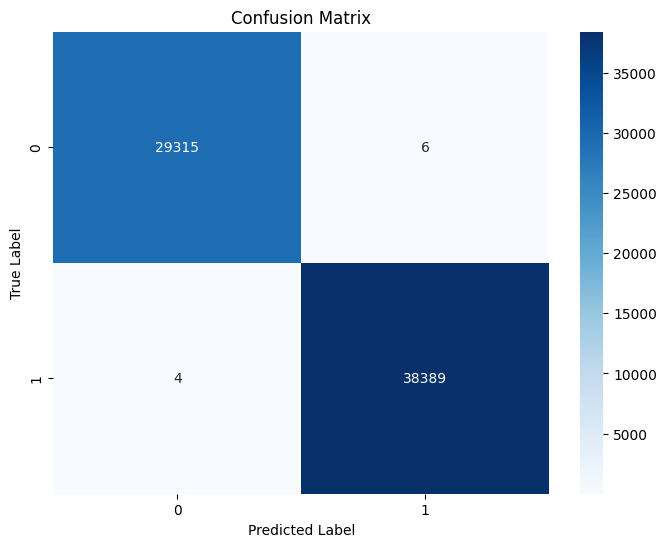

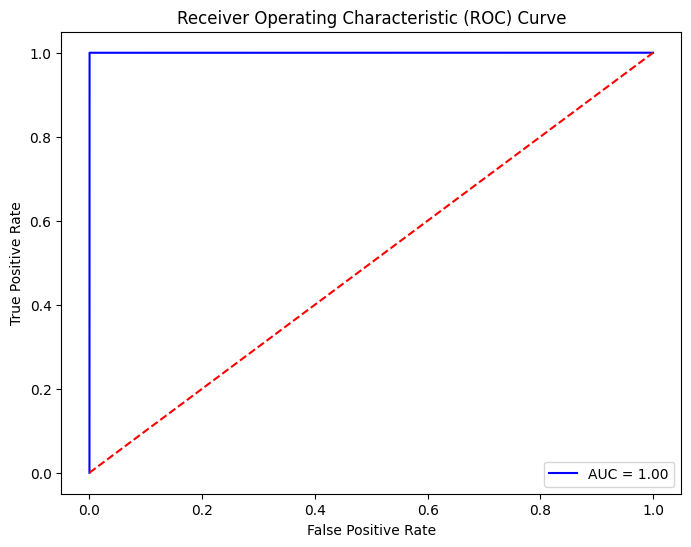

In [49]:
# Example: Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

from sklearn.metrics import roc_curve, auc

# Calculate ROC curve and AUC
y_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

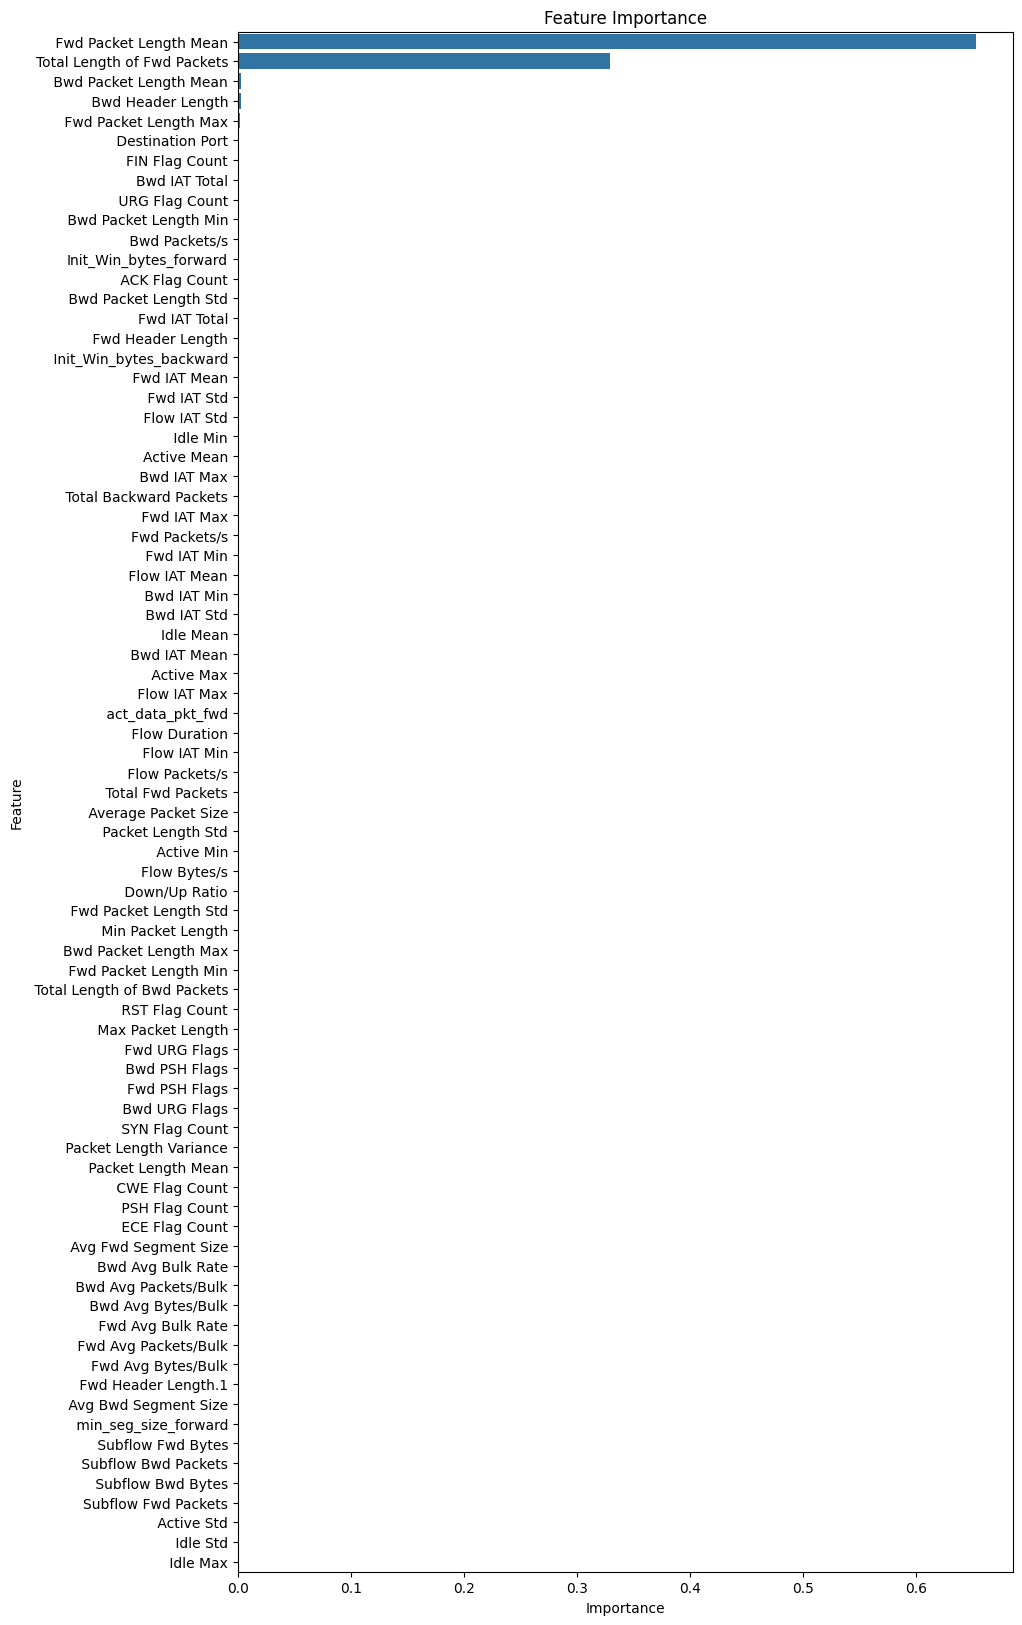

In [47]:
# Check feature importance for the best model (tree-based models)
if hasattr(best_model, 'feature_importances_'):
    feature_importances = best_model.feature_importances_
    
    # Create a DataFrame to view the feature importance
    feature_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': feature_importances
    })
    
    # Sort the features by importance
    feature_df = feature_df.sort_values(by='Importance', ascending=False)
    
    # Plot the feature importance
    plt.figure(figsize=(10, 20))
    sns.barplot(x='Importance', y='Feature', data=feature_df)
    plt.title('Feature Importance')
    plt.show()


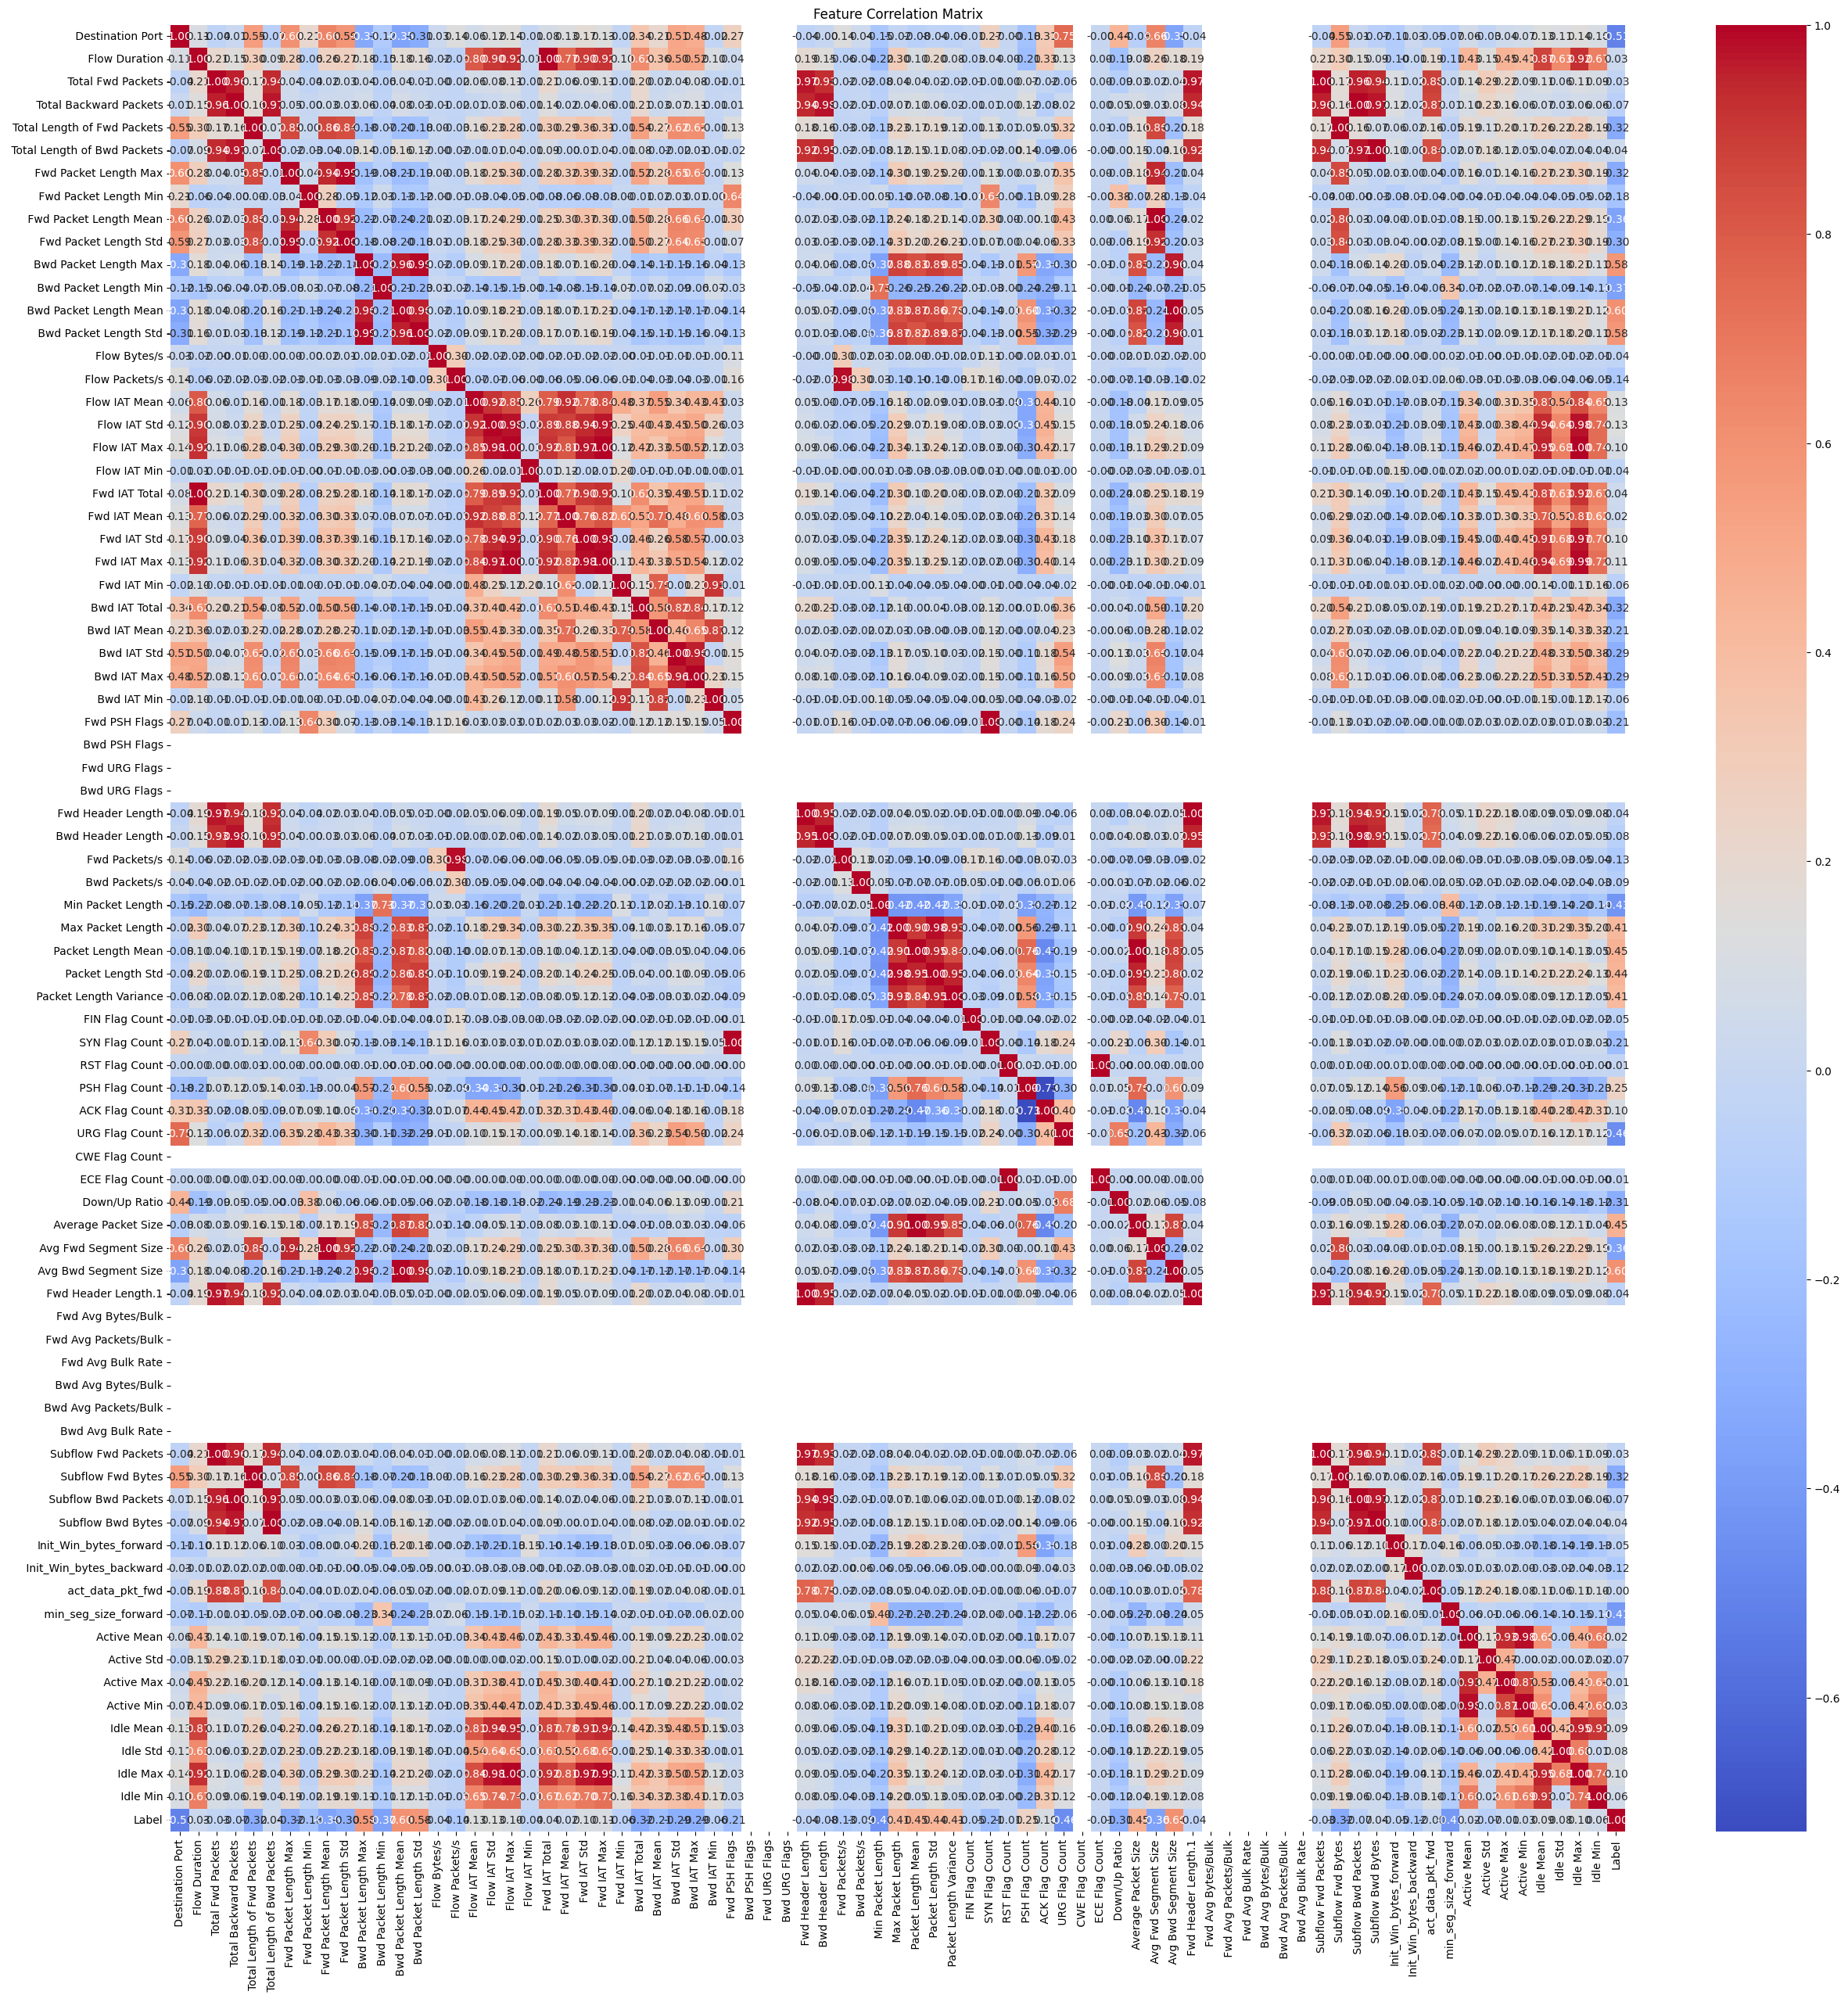

In [44]:
# Correlation matrix to check for feature correlation
corr_matrix = data.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()
